In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import dill as pickle

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras import regularizers

from sklearn.manifold import TSNE


from time import time

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
complete_preprocessed = pd.read_pickle("preprocessed")
complete_preprocessed.head()
complete_preprocessed.columns.values

array(['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek',
       'countryProvided', 'country_typeI', 'nationals',
       'educationGeneral', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'salary_<=50K', 'salary_>50K', 'maritalStatus_Divorced',
       'maritalStatus_Married-AF-spouse',
       'maritalStatus_Married-spouse-absent',
       'maritalStatus_Never-married'

In [3]:
X = complete_preprocessed[complete_preprocessed.columns.difference(
    ["salary_<=50K", "salary_>50K"])]

y = complete_preprocessed["salary_>50K"]

import sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from id3 import Id3Estimator

Liste = {
'Naive_Bayes_Gaussien': GaussianNB(),  # Naive Bayes classifier http://scikit-learn.org/stable/modules/naive_bayes.html
'CART': DecisionTreeClassifier(), # Classification And Regression Tree (CART) http://scikit-learn.org/stable/modules/tree.html
#'ID3' : id3.Id3Estimator(gain_ratio= True, prune = True),    # Iterative dichotomizer 3 (ID3) https://pypi.python.org/pypi/decision-tree-id3/0.1.2
'Decision Stump' : DecisionTreeClassifier(max_depth=1), # Decision Stump
'Reseau Neuronal 1 couche cachée': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1),
'Reseau_Neuronal 2 couches cachées': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 5), random_state=1), # Réseau de neurones à 2 couches cachées http://scikit-learn.org/stable/modules/neural_networks_supervised.html
'Bagging': BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0), # Bootstrap Aggregation http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
'AdaBoost 10': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=10),
'AdaBoost 50': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=50), # Adaboost http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html
'KNN 1': KNeighborsClassifier(n_neighbors=1, n_jobs = -1),
'KNN 3': KNeighborsClassifier(n_neighbors=3, n_jobs = -1), # K-plus proches voisins http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'KNN 5': KNeighborsClassifier(n_neighbors=5, n_jobs = -1),
'KNN 7': KNeighborsClassifier(n_neighbors=7, n_jobs = -1),
'Forêt_Aléatoire 15 arbres': RandomForestClassifier(n_estimators=15, n_jobs=-1),
'Forêt_Aléatoire 50 arbres': RandomForestClassifier(n_estimators=50, n_jobs=-1)   # Foret aléatoire http://scikit-learn.org/stable/modules/ensemble.html
}

In [12]:



# in order to reduct to 4 dimensions
encoding_dim = 4

# this is our input placeholder
input_var = Input(shape=(46, ))

# encoder layers
encoded = Dense(10, activation='relu')(input_var)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(46, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_var, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_var, output=encoder_output)




/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [13]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X, X,
                nb_epoch=20,
                batch_size=20,
                shuffle=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/20
48842/48842 [==============================] - 3s 70us/step - loss: 0.0533
Epoch 2/20
48842/48842 [==============================] - 3s 66us/step - loss: 0.0328
Epoch 3/20
48842/48842 [==============================] - 3s 67us/step - loss: 0.0284
Epoch 4/20
48842/48842 [==============================] - 3s 67us/step - loss: 0.0271
Epoch 5/20
48842/48842 [==============================] - 3s 68us/step - loss: 0.0266
Epoch 6/20
48842/48842 [==============================] - 3s 67us/step - loss: 0.0261
Epoch 7/20
48842/48842 [==============================] - 3s 67us/step - loss: 0.0256
Epoch 8/20
48842/48842 [==============================] - 3s 66us/step - loss: 0.0252
Epoch 9/20
48842/48842 [==============================] - 3s 67us/step - loss: 0.0250
Epoch 10/20
48842/48842 [==============================] - 3s 66us/step - loss: 0.0250
Epoch 11/20
48842/48842 [==============================] - 3s 67us/step - loss: 0.0249
Epoch 12/20
48842/48842 [===========================

In [16]:
X_encoded = encoder.predict(X, batch_size = 20)
X_encoded.shape

(48842, 4)

In [17]:
X_encoded_train, X_encoded_test, y_encoder_train, y_encoder_test = train_test_split(X_encoded, y, test_size = 0.2)

In [34]:
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# build a classifier
RF_encoded = RandomForestClassifier(n_estimators=20, n_jobs = -1)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# use a full grid over all parameters
param_grid_RF_encoded = {"max_depth": [None],
              "max_features": [1, 2],
              "min_samples_split": [10, 20],
              "min_samples_leaf": [10, 20],
              "bootstrap": [True],
              "criterion": ["entropy"]}

# run grid search
grid_search_RF_encoded = GridSearchCV(RF_encoded, param_grid=param_grid_RF_encoded, n_jobs = -1)
start = time()
grid_search_RF_encoded.fit(X_encoded_train, y_encoder_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_RF_encoded.cv_results_['params'])))
report(grid_search_RF_encoded.cv_results_)

GridSearchCV took 4.50 seconds for 8 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.828 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.828 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 3
Mean validation score: 0.827 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.827 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 20}



In [35]:
grid_search_RF_encoded.best_estimator_.score(X_encoded_test, y_encoder_test)

0.8343740403316614

In [31]:
RF = RandomForestClassifier(n_jobs = -1)

# use a full grid over all parameters
param_grid_RF = {"max_depth": [None],
              "max_features": [2, "log2", "sqrt"],
              "min_samples_split": [20, 10, 5],
              "min_samples_leaf": [20, 10, 5],
              "bootstrap": [True],
              "criterion": ["gini"],
                        "n_estimators": [20, 50, 100, 200]}

# run grid search
grid_search_RF = GridSearchCV(RF, param_grid=param_grid_RF, n_jobs = -1)
start = time()
grid_search_RF.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_RF.cv_results_['params'])))
report(grid_search_RF.cv_results_)

GridSearchCV took 59.03 seconds for 108 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.865 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.865 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.865 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}



In [32]:
grid_search_RF.best_estimator_.score(X_test, y_test)

0.8604770191421844

In [41]:
RF2 = RandomForestClassifier(n_jobs = -1)

# Specify parameters and distributions to sample from
param_dist_RF = {"max_depth": [3, None],
                 "max_features": sp_randint(1, 47),
                 "min_samples_split": sp_randint(2, 11),
                 "min_samples_leaf": sp_randint(1, 11),
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"]}


# Randomized search
n_iter_search = 20
random_search_RF = RandomizedSearchCV(RF2, param_distributions=param_dist_RF,
                                   n_iter=n_iter_search)

start = time()
random_search_RF.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search_RF.cv_results_)

RandomizedSearchCV took 22.70 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.864 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.863 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 0.863 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 18, 'min_samples_leaf': 10, 'min_samples_split': 2}



In [42]:
random_search_RF.best_estimator_.score(X_test, y_test)

0.8752175248234211

In [38]:
y_test.shape

(9769,)

In [44]:
knn = KNeighborsClassifier(n_jobs = -1)

param_grid_KNN = {"n_neighbors": range(1, 10, 2)}

grid_search_KNN = GridSearchCV(knn, param_grid=param_grid_KNN,
                                    n_jobs = -1)

start = time()
grid_search_KNN.fit(X, y)
pprint("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_RF_encoded.cv_results_['params'])))
report(grid_search_KNN.cv_results_)

RandomizedSearchCV took 134.33 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.832 (std: 0.002)
Parameters: {'n_neighbors': 9}

Model with rank: 2
Mean validation score: 0.829 (std: 0.003)
Parameters: {'n_neighbors': 7}

Model with rank: 3
Mean validation score: 0.825 (std: 0.004)
Parameters: {'n_neighbors': 5}



In [45]:
grid_search_KNN.best_estimator_.score(X_test, y_test)

0.8561777049851571

In [46]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8316101955164296

In [ ]:
import scipy

from sklearn import svm
SVM = svm.SVC()


param_dist_SVM = {"C": scipy.stats.expon(scale=100), 
                  'gamma': scipy.stats.expon(scale=.1),
                  'kernel': ['rbf'], 
                  'class_weight':['balanced', None]}

# Randomized search
n_iter_search = 40
random_search_SVM = RandomizedSearchCV(SVM, param_distributions=param_dist_SVM,
                                   n_iter=n_iter_search)

start = time()
random_search_SVM.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search_SVM.cv_results_)

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}


In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, average_precision_score
import time
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns

def tracePerformancesPercentage(dictionnaire): 
    pass
    
def runClassifiers(clfs, X, Y, graphe = True) :
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    kf2 = KFold(n_splits=5, shuffle=True, random_state=0)
    
    
    cv_acc = {}
    cv_auc = {}
    cv_prec = {}
    cv_prec5 = {}
    t0 = {}
    t1 = {}
    
    for i in clfs: # Ça c'est la clé.
        print(i)
        t0[i] = time.time()
        clf = clfs[i] #clf correspond au ième algorithme dans le dictionnaire clfs.
        # Ça, c'est la valeur.
        cv_acc[i] = cross_val_score(clf, X, Y, cv=kf, scoring = 'accuracy' )                       #
        # cv_auc[i] = cross_val_score(clf, X, Y, cv=kf, scoring='roc_auc')     # voir http://scikit-learn.org/stable/modules/model_evaluation.html
        # cv_prec[i] = cross_val_score(clf, X, Y, cv=kf, scoring='precision')  #
        # cv_prec5[i] = cross_val_score(clf, X, Y, cv=kf2, scoring='precision')#
        t1[i] = time.time()
        print("estimations par validation croisée 10 fold de {0} :".format(i))
        print("Taux biens classés = {0:.3f} +/- {1:.3f}".format(np.mean(cv_acc[i]), np.std(cv_acc[i])))
        # print("AUC = {0:.3f} +/- {1:.3f}".format(np.mean(cv_auc[i]), np.std(cv_auc[i])))
        # print("Précision = {0:.3f} +/- {1:.3f}".format(np.mean(cv_prec[i]), np.std(cv_prec[i])))
        # print("Précision (5 fold) = {0:.3f} +/- {1:.3f}".format(np.mean(cv_prec5[i]), np.std(cv_prec5[i])))
        print("Temps d'exécution = {0:.3f} secondes".format(t1[i] - t0[i]))
        print('\n')

    if graphe:
        cv_acc_df = pd.DataFrame.from_dict(cv_acc)
        # cv_prec_df = pd.DataFrame.from_dict(cv_prec)
        # cv_prec5_df = pd.DataFrame.from_dict(cv_prec5)

        plt.figure(figsize=(30, 8))
#         ax1 = plt.subplot(121)
#         ax1 = sns.boxplot(data = cv_prec_df, palette="Set3", orient = "h")
#         ax1.tick_params(labelsize = 25, colors='darkblue')
#         ax1.set_title("Précision par validation croisée 10-folds", fontsize = 30)
#         ax2 = plt.subplot(122)
#         ax2 = sns.boxplot(data = cv_prec5_df, palette="Set3", orient = "h")
#         ax2.set_yticklabels([])
#         ax2.tick_params(labelsize = 25, colors='darkblue')
#         ax2.set_title("Précision par validation croisée 5-folds", fontsize = 30)
        sns.boxplot(data = cv_acc_df, palette="Set3", orient = "h")
        
        plt.show()


KNN 1
estimations par validation croisée 10 fold de KNN 1 :
Taux biens classés = 0.797 +/- 0.004
Temps d'exécution = 30.507 secondes


KNN 3
estimations par validation croisée 10 fold de KNN 3 :
Taux biens classés = 0.819 +/- 0.006
Temps d'exécution = 34.566 secondes




/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


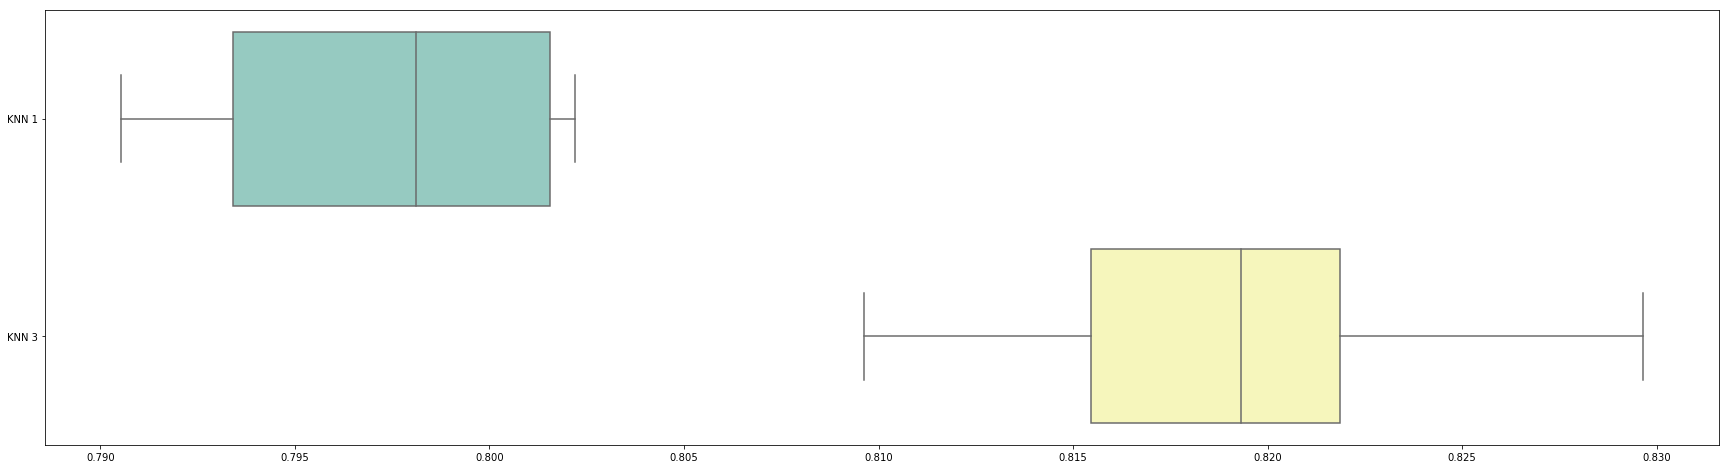

In [21]:
algos = { key:value for key,value in Liste.items() if key in ["KNN 1", "KNN 3"]}

runClassifiers(algos, X, y, graphe = True)

KNN 5
estimations par validation croisée 10 fold de KNN 5 :
Taux biens classés = 0.828 +/- 0.005
AUC = 0.844 +/- 0.007
Précision = 0.664 +/- 0.015
Précision (5 fold) = 0.663 +/- 0.012
Temps d'exécution = 139.375 secondes


KNN 7
estimations par validation croisée 10 fold de KNN 7 :
Taux biens classés = 0.831 +/- 0.006
AUC = 0.857 +/- 0.008
Précision = 0.677 +/- 0.017
Précision (5 fold) = 0.675 +/- 0.012
Temps d'exécution = 145.287 secondes




/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


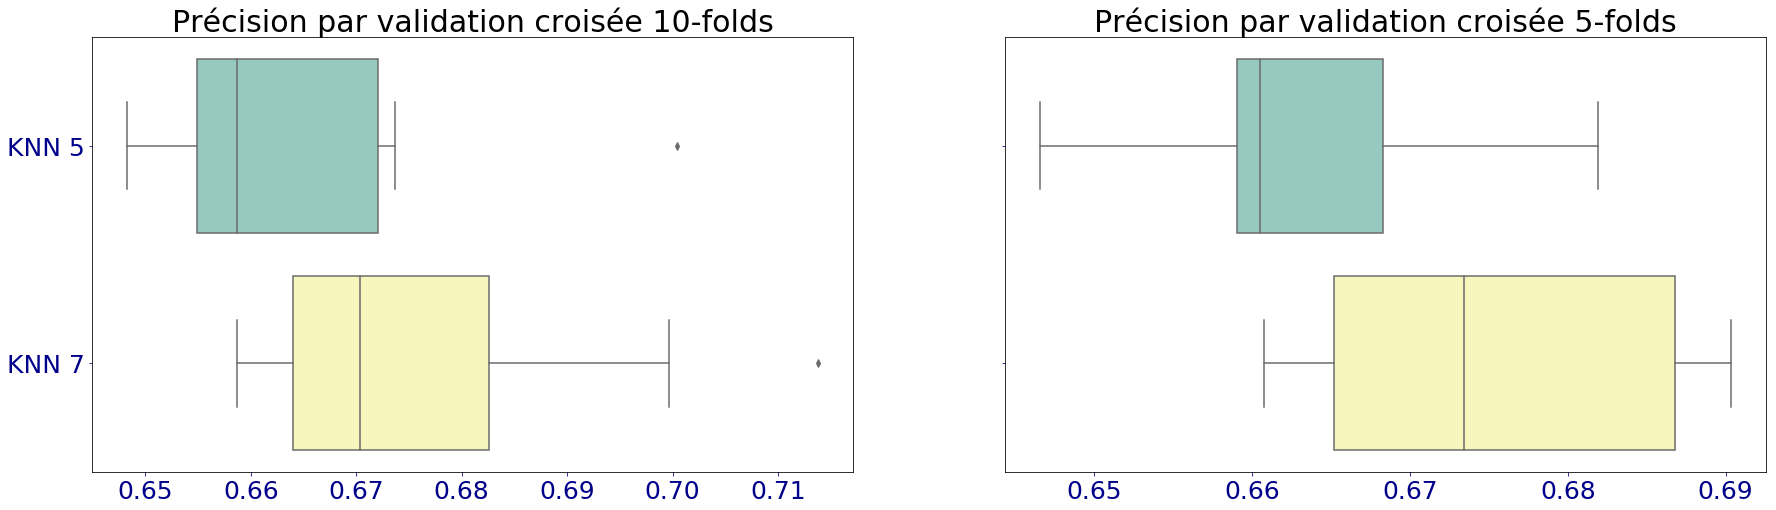

In [19]:
algos = { key:value for key,value in Liste.items() if key in ["KNN 5", "KNN 7"]}
runClassifiers(algos, X, y, graphe = True)

estimations par validation croisée 10 fold de Naive_Bayes_Gaussien :
Taux biens classés = 0.672 +/- 0.009
AUC = 0.870 +/- 0.010
Précision = 0.416 +/- 0.012
Précision (5 fold) = 0.416 +/- 0.011
Temps d'exécution = 1.730 secondes


estimations par validation croisée 10 fold de CART :
Taux biens classés = 0.822 +/- 0.005
AUC = 0.777 +/- 0.006
Précision = 0.633 +/- 0.015
Précision (5 fold) = 0.633 +/- 0.007
Temps d'exécution = 9.012 secondes


estimations par validation croisée 10 fold de Decision Stump :
Taux biens classés = 0.803 +/- 0.005
AUC = 0.593 +/- 0.009
Précision = 0.946 +/- 0.009
Précision (5 fold) = 0.947 +/- 0.003
Temps d'exécution = 1.101 secondes


estimations par validation croisée 10 fold de Reseau Neuronal 1 couche cachée :
Taux biens classés = 0.856 +/- 0.005
AUC = 0.910 +/- 0.005
Précision = 0.738 +/- 0.017
Précision (5 fold) = 0.737 +/- 0.011
Temps d'exécution = 303.992 secondes


estimations par validation croisée 10 fold de Reseau_Neuronal 2 couches cachées :
Taux bi

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


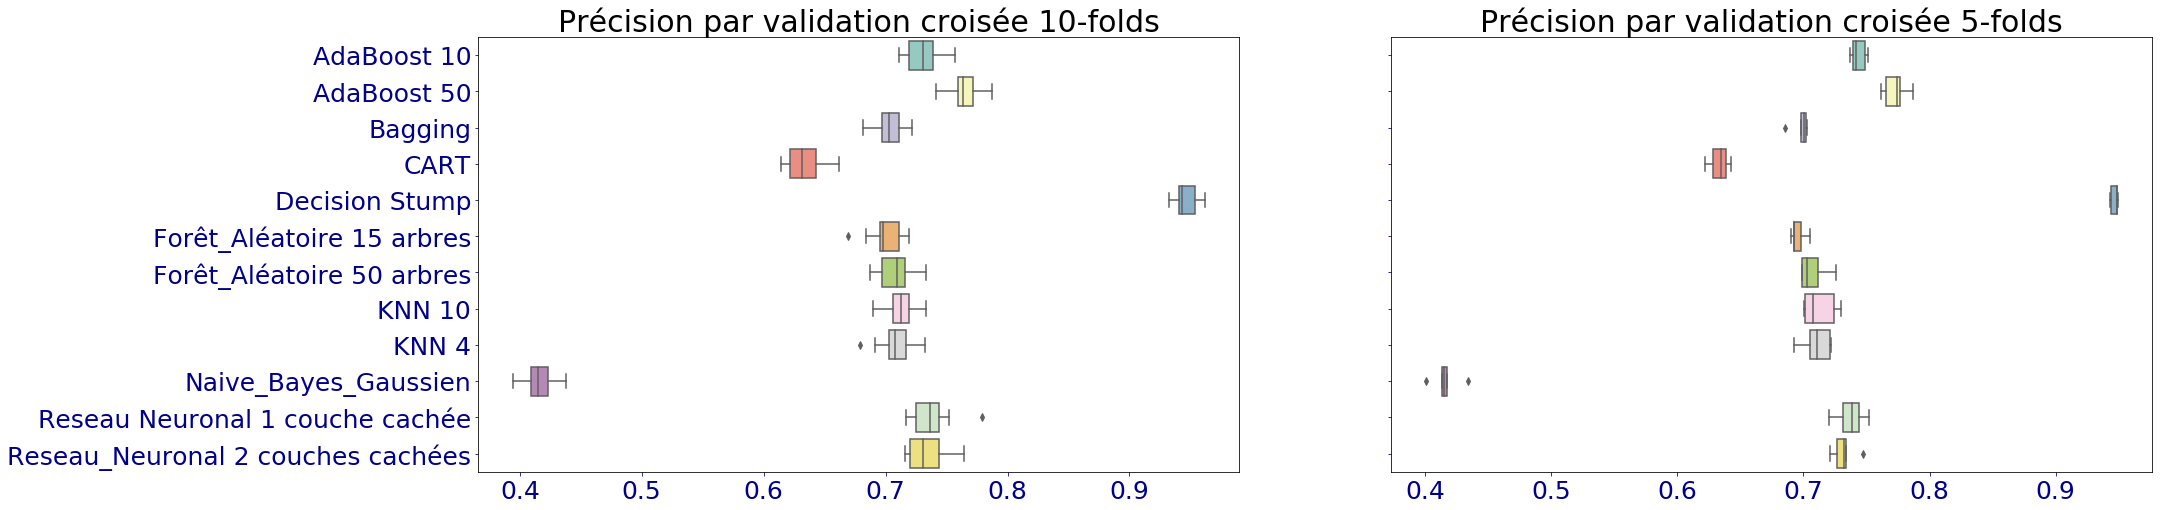

In [11]:
runClassifiers(Liste, X, y, graphe = True)

We try to save all the models:

In [13]:
import dill as pickle

filename = "classicalModels"
pickle.dump(Liste, open(filename, "wb"))